<a href="https://colab.research.google.com/github/Angelespinosa10/git/blob/main/actividad_flechas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contorno 0, Área: 5804.0
Contorno 1, Área: 6481.0
Contorno 2, Área: 3970.5
Contorno 3, Área: 3967.0
Contorno 4, Área: 5780.0
Contorno 5, Área: 5773.0
Contorno 6, Área: 3552.0
Contorno 7, Área: 8025.5
Contorno 8, Área: 4110.0
Contorno 10, Área: 3967.0
Contorno 11, Área: 2992.0
Contorno 12, Área: 4696.0


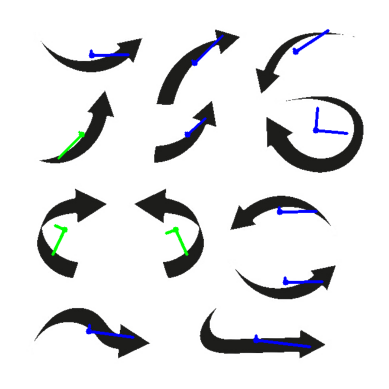

In [47]:
import numpy as np
import cv2
import requests
from math import atan2, cos, sin, sqrt, pi
import matplotlib.pyplot as plt

# Descargar la imagen
image_url = "https://img.freepik.com/vector-gratis/flechas-finas-gruesas_78370-343.jpg"
response = requests.get(image_url, stream=True)
response.raise_for_status()

image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convertir a escala de grises y binarizar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Encontrar contornos
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


def get_arrow_color(angle):
    """Define el color de la flecha según el ángulo."""
    angle_deg = np.degrees(angle)  # Convertir el ángulo a grados

    if -45 <= angle_deg < 45:   # Flecha apuntando a la derecha
        return (255, 0, 0)  # Azul
    elif 45 <= angle_deg < 135:  # Flecha apuntando hacia arriba
        return (0, 255, 0)  # Verde
    elif -135 <= angle_deg < -45:  # Flecha apuntando hacia abajo
        return (0, 0, 255)  # Rojo
    else:  # Flecha apuntando a la izquierda
        return (0, 255, 255)  # Amarillo


def get_orientation(pts, img):
    """Calcula la orientación de la flecha y dibuja los ejes principales."""
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)

    for i in range(data_pts.shape[0]):
        data_pts[i, 0] = pts[i, 0, 0]
        data_pts[i, 1] = pts[i, 0, 1]

    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)

    cntr = (int(mean[0, 0]), int(mean[0, 1]))
    angle = atan2(eigenvectors[0, 1], eigenvectors[0, 0])

    # Obtener el color basado en la dirección
    arrow_color = get_arrow_color(angle)

    # Dibujar la flecha con el color adecuado
    cv2.circle(img, cntr, 5, arrow_color, -1)
    draw_axis(img, cntr, arrow_color, eigenvectors, eigenvalues)

    return angle, img


def draw_axis(img, cntr, color, eigenvectors, eigenvalues):
    """Dibuja los ejes principales de la flecha."""
    p1 = (int(cntr[0] + 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0]),
          int(cntr[1] + 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0]))
    p2 = (int(cntr[0] - 0.02 * eigenvectors[1, 0] * eigenvalues[1, 0]),
          int(cntr[1] - 0.02 * eigenvectors[1, 1] * eigenvalues[1, 0]))

    cv2.line(img, cntr, p1, color, 3)
    cv2.line(img, cntr, p2, color, 3)


# Procesar cada contorno
for i, c in enumerate(contours):
    area = cv2.contourArea(c)

    if area < 1e3 or area > 1e5:
        continue

    print(f"Contorno {i}, Área: {area}")

    # Dibujar el contorno en blanco para mejor visibilidad
    cv2.drawContours(image, [c], -1, (255, 255, 255), 2)

    # Obtener la orientación y dibujar la flecha con el color correspondiente
    _, image = get_orientation(c, image)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
